In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

In [38]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [39]:
# Load stocks data for Microsoft and Apple
stocks_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/stock_data.csv', index_col='Date', parse_dates=True) # Significant to have index as date
stocks_df = stocks_df[(stocks_df['company_name'] == 'MICROSOFT') | (stocks_df['company_name'] == 'APPLE')]

# Keep only the columns we need (company_name, Adj Close)
stocks_df = stocks_df[['company_name', 'Adj Close']]
stocks_df

,company_name,Adj Close
Date,,
2019-02-19,APPLE,41.138523
2019-02-20,APPLE,41.403271
2019-02-21,APPLE,41.169807
2019-02-22,APPLE,41.629509
2019-02-25,APPLE,41.932755
...,...,...
2024-02-12,MICROSOFT,414.493500
2024-02-13,MICROSOFT,405.570007
2024-02-14,MICROSOFT,409.489990


In [40]:
# Separate dataframe for Microsoft stocks
microsoft_df = stocks_df[stocks_df['company_name'] == 'MICROSOFT']
microsoft_df = microsoft_df.drop(columns=['company_name']) # Drop the company_name column
microsoft_df.head()

,Adj Close
Date,
2019-02-19,102.528320
2019-02-20,101.995255
2019-02-21,104.146538
2019-02-22,105.631493
2019-02-25,106.221664


In [41]:
# Separate dataframe for Apple stocks
apple_df = stocks_df[stocks_df['company_name'] == 'APPLE']
apple_df = apple_df.drop(columns=['company_name']) # Drop the company_name column
apple_df.head()

,Adj Close
Date,
2019-02-19,41.138523
2019-02-20,41.403271
2019-02-21,41.169807
2019-02-22,41.629509
2019-02-25,41.932755


In [42]:
# Load temperature data
temperature_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/cities_temperature.csv')
temperature_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Australia/South Pacific,Australia,NaN,Sydney,1,1,1995,59.1
1,Australia/South Pacific,Australia,NaN,Sydney,1,2,1995,64.6
2,Australia/South Pacific,Australia,NaN,Sydney,1,3,1995,79.1
3,Australia/South Pacific,Australia,NaN,Sydney,1,4,1995,77.3
4,Australia/South Pacific,Australia,NaN,Sydney,1,5,1995,70.2


In [43]:
# Cities of interest
city_1 = "Calgary"
city_2 = "Buenos Aires"
city_3 = "Edmonton"

# Extract data for cities
city_1_df = temperature_df[temperature_df['City'] == city_1].copy() # Use copy to avoid SettingWithCopyWarning
city_2_df = temperature_df[temperature_df['City'] == city_2].copy()
city_3_df = temperature_df[temperature_df['City'] == city_3].copy()

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
9266,North America,Canada,NaN,Calgary,1,1,1995,12.6
9267,North America,Canada,NaN,Calgary,1,2,1995,4.5
9268,North America,Canada,NaN,Calgary,1,3,1995,2.5
9269,North America,Canada,NaN,Calgary,1,4,1995,11.4
9270,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [44]:
# Create new Date column by aggregating Month, Day, and Year columns to MM/DD/YYYY format, then convert to DateTimeIndex

city_1_df['Date'] = pd.to_datetime(city_1_df['Month'].astype(str) + '/' + city_1_df['Day'].astype(str) + '/' + city_1_df['Year'].astype(str))
city_1_df = city_1_df.set_index('Date')

city_2_df['Date'] = pd.to_datetime(city_2_df['Month'].astype(str) + '/' + city_2_df['Day'].astype(str) + '/' + city_2_df['Year'].astype(str))
city_2_df = city_2_df.set_index('Date')

city_3_df['Date'] = pd.to_datetime(city_3_df['Month'].astype(str) + '/' + city_3_df['Day'].astype(str) + '/' + city_3_df['Year'].astype(str))
city_3_df = city_3_df.set_index('Date')

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Date,,,,,,,,
1995-01-01,North America,Canada,NaN,Calgary,1,1,1995,12.6
1995-01-02,North America,Canada,NaN,Calgary,1,2,1995,4.5
1995-01-03,North America,Canada,NaN,Calgary,1,3,1995,2.5
1995-01-04,North America,Canada,NaN,Calgary,1,4,1995,11.4
1995-01-05,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [45]:
# Keep only the columns we need
city_1_df = city_1_df[['AvgTemperature']]
city_2_df = city_2_df[['AvgTemperature']]
city_3_df = city_3_df[['AvgTemperature']]

city_1_df.head()

,AvgTemperature
Date,
1995-01-01,12.6
1995-01-02,4.5
1995-01-03,2.5
1995-01-04,11.4
1995-01-05,11.3


# Q1

## (a)

<Axes: title={'center': 'Microsoft vs Apple Adjusted Closing Price (Daily)'}, xlabel='Date', ylabel='Adj Close'>

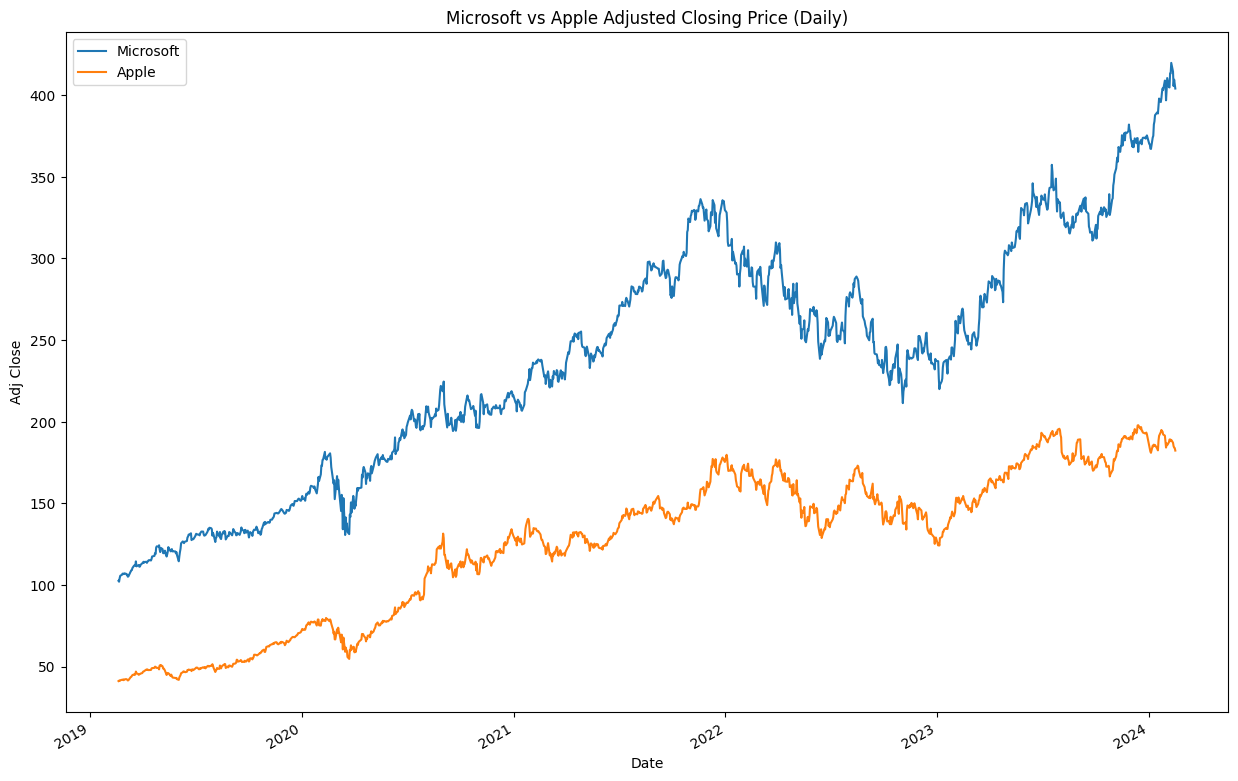

In [81]:
# Plot the time series of Microsoft and Apple stock prices on the same plot

## YOUR CODE STARTS HERE
fig, ax = plt.subplots()

microsoft_df.plot(ax=ax, y='Adj Close', label='Microsoft', title="Microsoft vs Apple Adjusted Closing Price (Daily)", xlabel="Date", ylabel="Adj Close", figsize=(15,10))
apple_df.plot(ax=ax, y='Adj Close', label='Apple', xlabel="Date", ylabel="Adj Close")


**Enter answer here:** Both the Microsoft and Apple trends increase gradually overtime (2019 to 2024). Microsoft has consistently higher adjusted closing prices than apple; however, it also has a higher variation in price as well.


## (b)

In [47]:
# Downsample Microsoft stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE
microsoft_weekly = microsoft_df.resample('W').mean()
microsoft_monthly = microsoft_df.resample('ME').mean()
microsoft_quarterly = microsoft_df.resample('QE').mean()
microsoft_semiannual = microsoft_df.resample('6ME').mean()
microsoft_annual = microsoft_df.resample('YE').mean()


<Axes: title={'center': 'Microsoft Adj Close: Daily vs Downsampled'}, xlabel='Date', ylabel='Adj Close'>

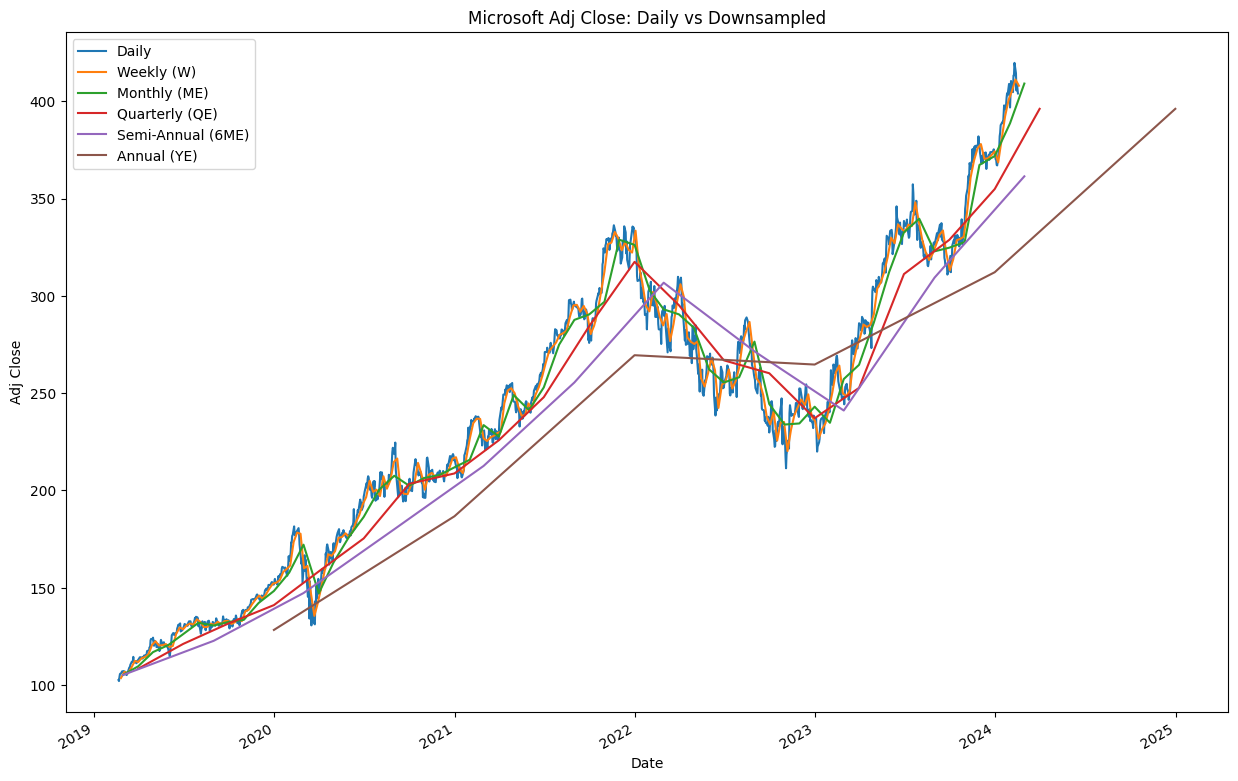

In [82]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Microsoft on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE
fig, ax = plt.subplots()

microsoft_df.plot(ax=ax, y='Adj Close', label='Daily', title="Microsoft Adj Close: Daily vs Downsampled", xlabel="Date", ylabel="Adj Close", figsize=(15,10))

microsoft_weekly.plot(ax=ax, y='Adj Close', label='Weekly (W)', xlabel="Date", ylabel="Adj Close")
microsoft_monthly.plot(ax=ax, y='Adj Close', label='Monthly (ME)', xlabel="Date", ylabel="Adj Close")
microsoft_quarterly.plot(ax=ax, y='Adj Close', label='Quarterly (QE)', xlabel="Date", ylabel="Adj Close")
microsoft_semiannual.plot(ax=ax, y='Adj Close', label='Semi-Annual (6ME)', xlabel="Date", ylabel="Adj Close")
microsoft_annual.plot(ax=ax, y='Adj Close', label='Annual (YE)', xlabel="Date", ylabel="Adj Close")


In [49]:
 # Downsample Apple stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE
apple_weekly = apple_df.resample('W').mean()
apple_monthly = apple_df.resample('ME').mean()
apple_quarterly = apple_df.resample('QE').mean()
apple_semiannual = apple_df.resample('6ME').mean()
apple_annual = apple_df.resample('YE').mean()


<Axes: title={'center': 'Apple Adj Close: Daily vs Downsampled'}, xlabel='Date', ylabel='Adj Close'>

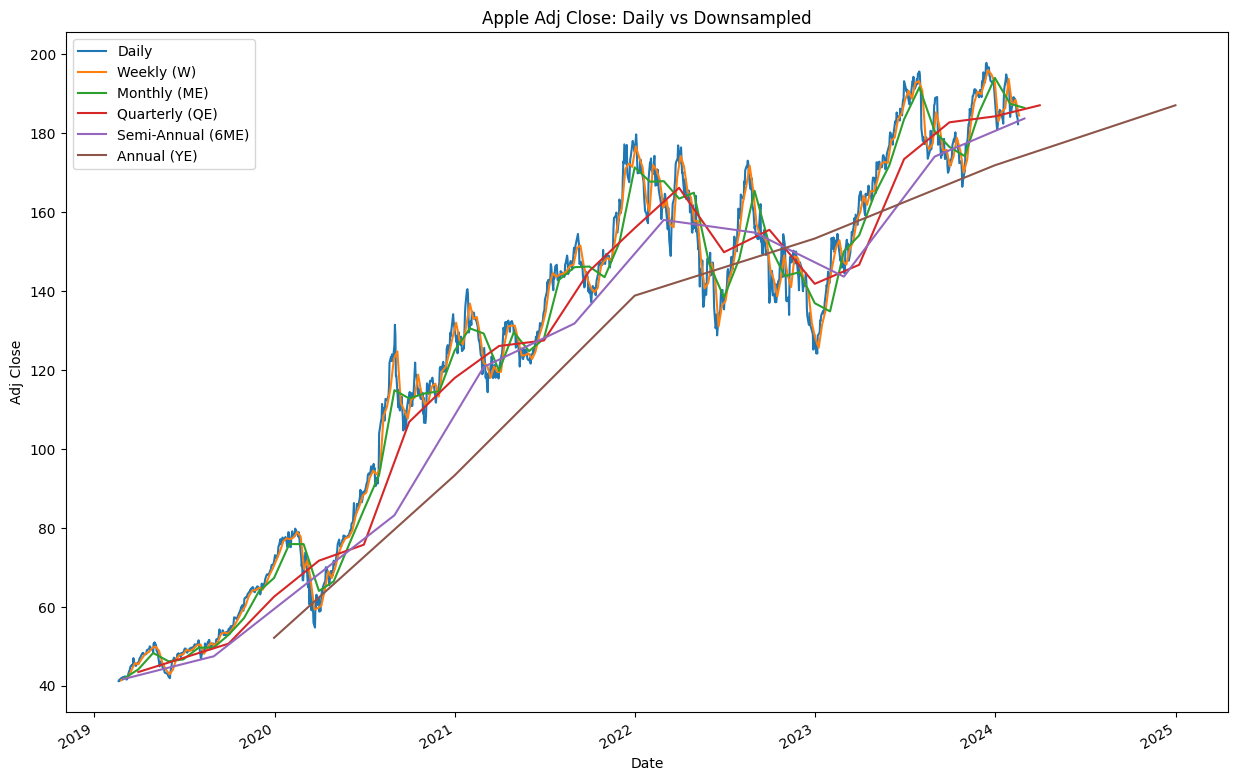

In [83]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Apple on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE
fig, ax = plt.subplots()

apple_df.plot(ax=ax, y='Adj Close', label='Daily', title="Apple Adj Close: Daily vs Downsampled", xlabel="Date", ylabel="Adj Close", figsize=(15,10))

apple_weekly.plot(ax=ax, y='Adj Close', label='Weekly (W)', xlabel="Date", ylabel="Adj Close")
apple_monthly.plot(ax=ax, y='Adj Close', label='Monthly (ME)', xlabel="Date", ylabel="Adj Close")
apple_quarterly.plot(ax=ax, y='Adj Close', label='Quarterly (QE)', xlabel="Date", ylabel="Adj Close")
apple_semiannual.plot(ax=ax, y='Adj Close', label='Semi-Annual (6ME)', xlabel="Date", ylabel="Adj Close")
apple_annual.plot(ax=ax, y='Adj Close', label='Annual (YE)', xlabel="Date", ylabel="Adj Close")

# Q2

In [51]:
# Add a column to the monthly downsampled Microsoft dataframe (from Q1) called 'monthly_return'
# This column will contain the monthly return of the stock (use the pct_change() method)
# Then display the first 5 rows of the dataframe

## YOUR CODE STARTS HERE
microsoft_monthly['monthly_return'] = microsoft_monthly['Adj Close'].pct_change()
microsoft_monthly.head()


,Adj Close,monthly_return
Date,,
2019-02-28,105.111517,NaN
2019-03-31,109.594991,0.042654
2019-04-30,116.887392,0.066540
2019-05-31,120.511057,0.031001
2019-06-30,126.109168,0.046453


In [52]:
# Do the same for the monthly downsampled Apple dataframe

## YOUR CODE STARTS HERE
apple_monthly['monthly_return'] = apple_monthly['Adj Close'].pct_change()
apple_monthly.head()


,Adj Close,monthly_return
Date,,
2019-02-28,41.623787,NaN
2019-03-31,44.114187,0.059831
2019-04-30,48.259177,0.093960
2019-05-31,46.151073,-0.043683
2019-06-30,46.621609,0.010196


<Axes: title={'center': 'Monthly Return: Microsoft vs Apple'}, xlabel='Date', ylabel='monthly_return'>

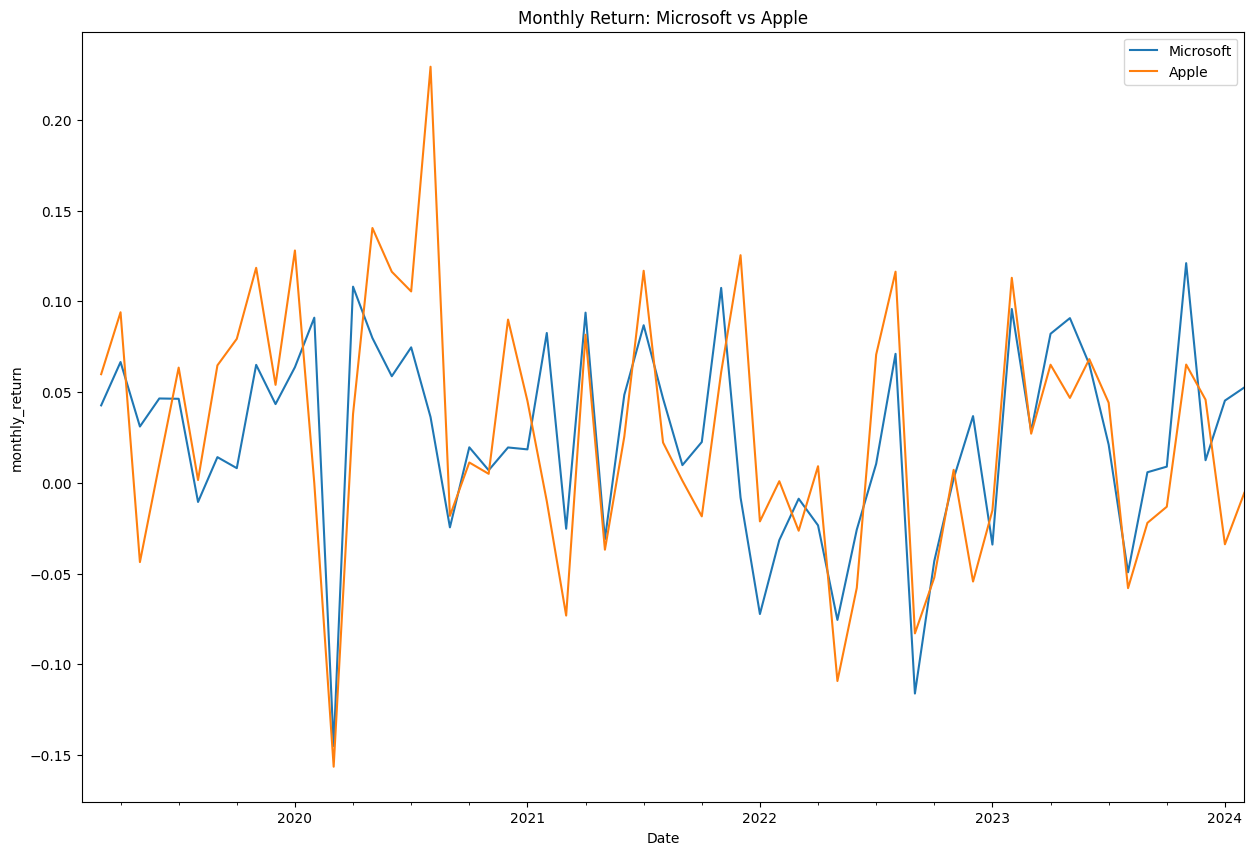

In [84]:
# Plot the monthly return of Microsoft and Apple stocks on the same plot

## YOUR CODE STARTS HERE
fig, ax = plt.subplots()

microsoft_monthly.plot(ax=ax, y='monthly_return', label='Microsoft', title="Monthly Return: Microsoft vs Apple", xlabel="Date", ylabel="monthly_return", figsize=(15,10))
apple_monthly.plot(ax=ax, y='monthly_return', label='Apple', xlabel="Date", ylabel="monthly_return")

**Enter answer here:**


# Q3

In [65]:
# Smooth the monthly stock prices of Microsoft using exponential smoothing with alpha = 0.1, 0.4, 0.7, 0.9

## YOUR CODE STARTS HERE
microsoft_exp_01 = microsoft_monthly.ewm(alpha=0.1, adjust=False).mean()
microsoft_exp_04 = microsoft_monthly.ewm(alpha=0.4, adjust=False).mean()
microsoft_exp_07 = microsoft_monthly.ewm(alpha=0.7, adjust=False).mean()
microsoft_exp_09 = microsoft_monthly.ewm(alpha=0.9, adjust=False).mean()


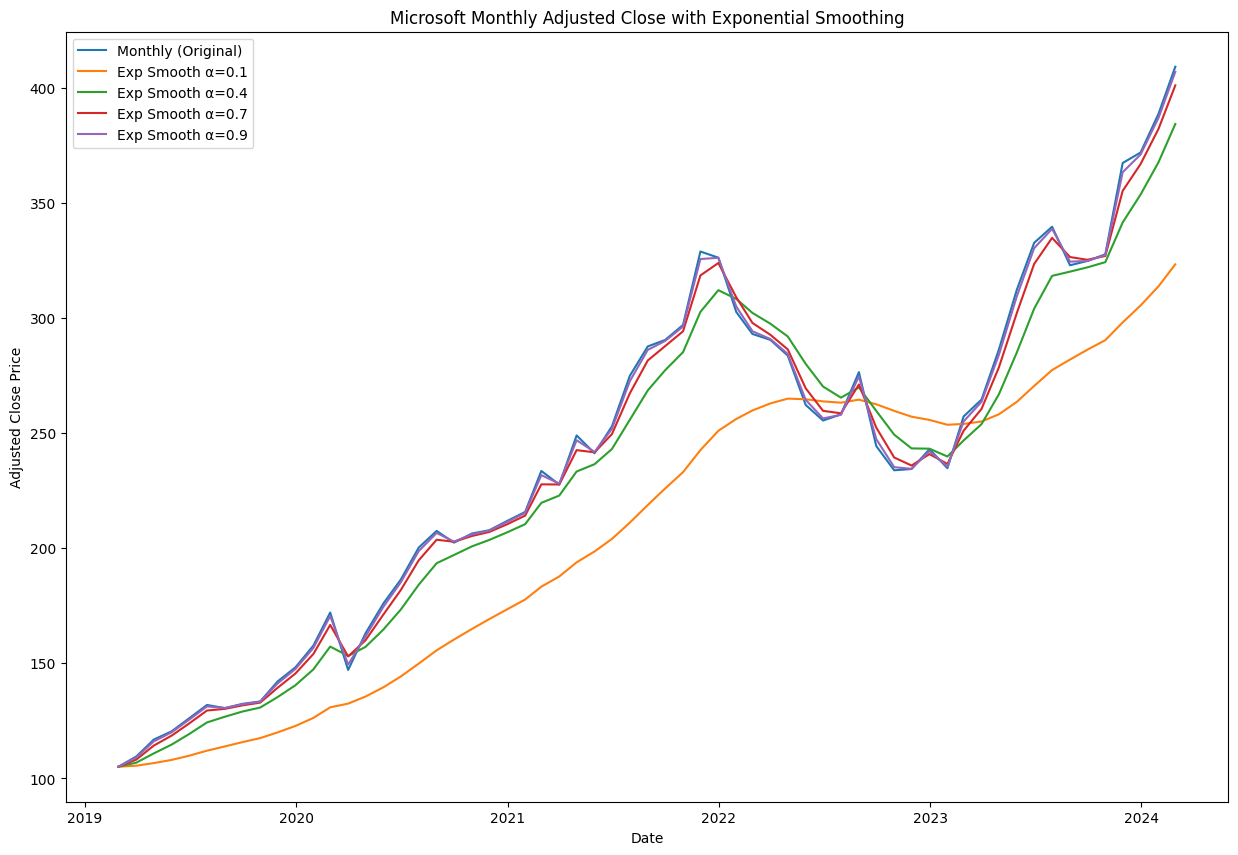

In [68]:
# Plot the monthly and smoothed monthly stock prices of Microsoft on the same plot (5 lines)

## YOUR CODE STARTS HERE
fig, ax = plt.subplots()

microsoft_monthly.plot(ax=ax, y='Adj Close', label='Monthly', title="Microsoft Monthly Adj Close with Exponential Smoothing", xlabel="Date", ylabel="Adj Close", figsize=(15,10))

microsoft_exp_01.plot(ax=ax, y='Adj Close', label='a=0.1', xlabel="Date", ylabel="Adj Close")
microsoft_exp_04.plot(ax=ax, y='Adj Close', label='a=0.4', xlabel="Date", ylabel="Adj Close")
microsoft_exp_07.plot(ax=ax, y='Adj Close', label='a=0.7', xlabel="Date", ylabel="Adj Close")
microsoft_exp_09.plot(ax=ax, y='Adj Close', label='a=0.9', xlabel="Date", ylabel="Adj Close")


In [86]:
# Smooth the monthly stock prices of Apple using exponential smoothing with alpha = 0.1, 0.4, 0.7, 0.9

## YOUR CODE STARTS HERE
apple_exp_01 = apple_monthly.ewm(alpha=0.1, adjust=False).mean()
apple_exp_04 = apple_monthly.ewm(alpha=0.4, adjust=False).mean()
apple_exp_07 = apple_monthly.ewm(alpha=0.7, adjust=False).mean()
apple_exp_09 = apple_monthly.ewm(alpha=0.9, adjust=False).mean()


<Axes: title={'center': 'Apple Monthly Adj Close with Exponential Smoothing'}, xlabel='Date', ylabel='Adj Close'>

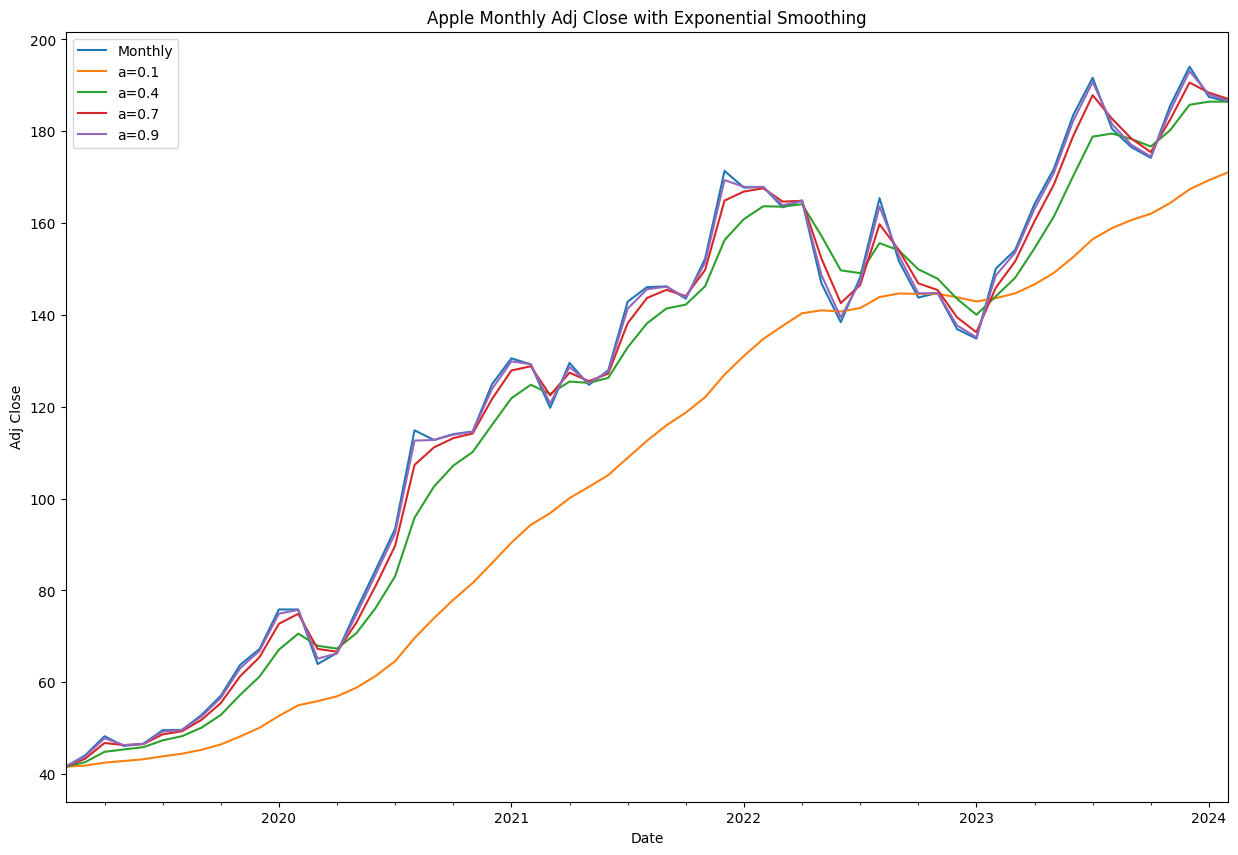

In [87]:
# Plot the monthly and smoothed monthly stock prices of Apple on the same plot (5 lines)

## YOUR CODE STARTS HERE
fig, ax = plt.subplots()

apple_monthly.plot(ax=ax, y='Adj Close', label='Monthly', title="Apple Monthly Adj Close with Exponential Smoothing", xlabel="Date", ylabel="Adj Close", figsize=(15,10))

apple_exp_01.plot(ax=ax, y='Adj Close', label='a=0.1', xlabel="Date", ylabel="Adj Close")
apple_exp_04.plot(ax=ax, y='Adj Close', label='a=0.4', xlabel="Date", ylabel="Adj Close")
apple_exp_07.plot(ax=ax, y='Adj Close', label='a=0.7', xlabel="Date", ylabel="Adj Close")
apple_exp_09.plot(ax=ax, y='Adj Close', label='a=0.9', xlabel="Date", ylabel="Adj Close")


**Enter answer here:**

# Q4

## (a)

<Axes: title={'center': 'Edmonton Daily Temperature'}, xlabel='Date', ylabel='AvgTemperature'>

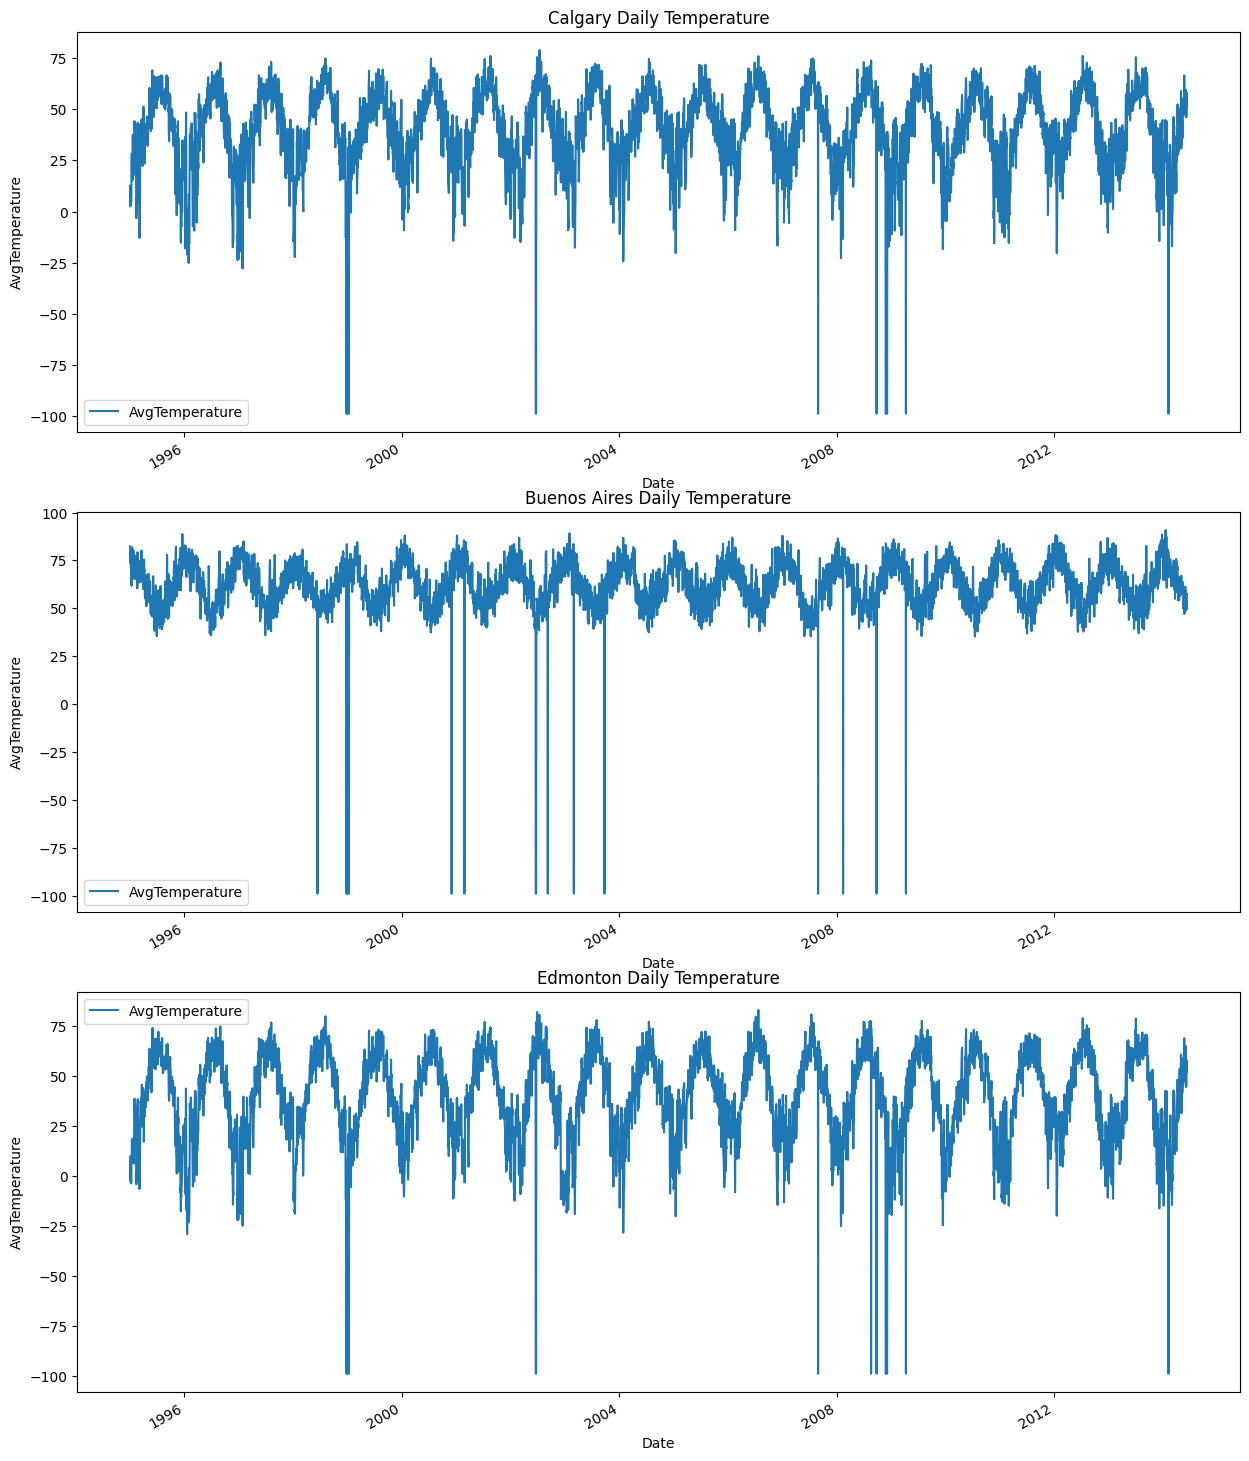

In [88]:
# Plot temperature data for each city in different subplots

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))

city_1_df.plot(ax=ax[0], y='AvgTemperature', title=f"{city_1} Daily Temperature", xlabel="Date", ylabel="AvgTemperature")
city_2_df.plot(ax=ax[1], y='AvgTemperature', title=f"{city_2} Daily Temperature", xlabel="Date", ylabel="AvgTemperature")
city_3_df.plot(ax=ax[2], y='AvgTemperature', title=f"{city_3} Daily Temperature", xlabel="Date", ylabel="AvgTemperature")

**Enter answer here:** The first problem is that each city has different date coverage so it is hard to compare them. The second problem is there is a lot of noisy data thus it is harder to see the temperatures in detail.

## (b)

In [73]:
# Remove entries that aren't in intersection of all three indices (which are dates)

## YOUR CODE STARTS HERE
index_intersection = city_1_df.index.intersection(city_2_df.index).intersection(city_3_df.index)
city_1_df = city_1_df.loc[index_intersection]
city_2_df = city_2_df.loc[index_intersection]
city_3_df = city_3_df.loc[index_intersection]


In [74]:
# Downsample the data to monthly

## YOUR CODE STARTS HERE
city_1_monthly = city_1_df.resample('ME').mean()
city_2_monthly = city_2_df.resample('ME').mean()
city_3_monthly = city_3_df.resample('ME').mean()


In [75]:
# Apply exponential smoothing to temperature data with alpha = 0.4

## YOUR CODE STARTS HERE
city_1_monthly_smoothed = city_1_monthly.ewm(alpha=0.4, adjust=False).mean()
city_2_monthly_smoothed = city_2_monthly.ewm(alpha=0.4, adjust=False).mean()
city_3_monthly_smoothed = city_3_monthly.ewm(alpha=0.4, adjust=False).mean()


<Axes: title={'center': 'Edmonton Monthly Temperature'}, xlabel='Date', ylabel='AvgTemperature'>

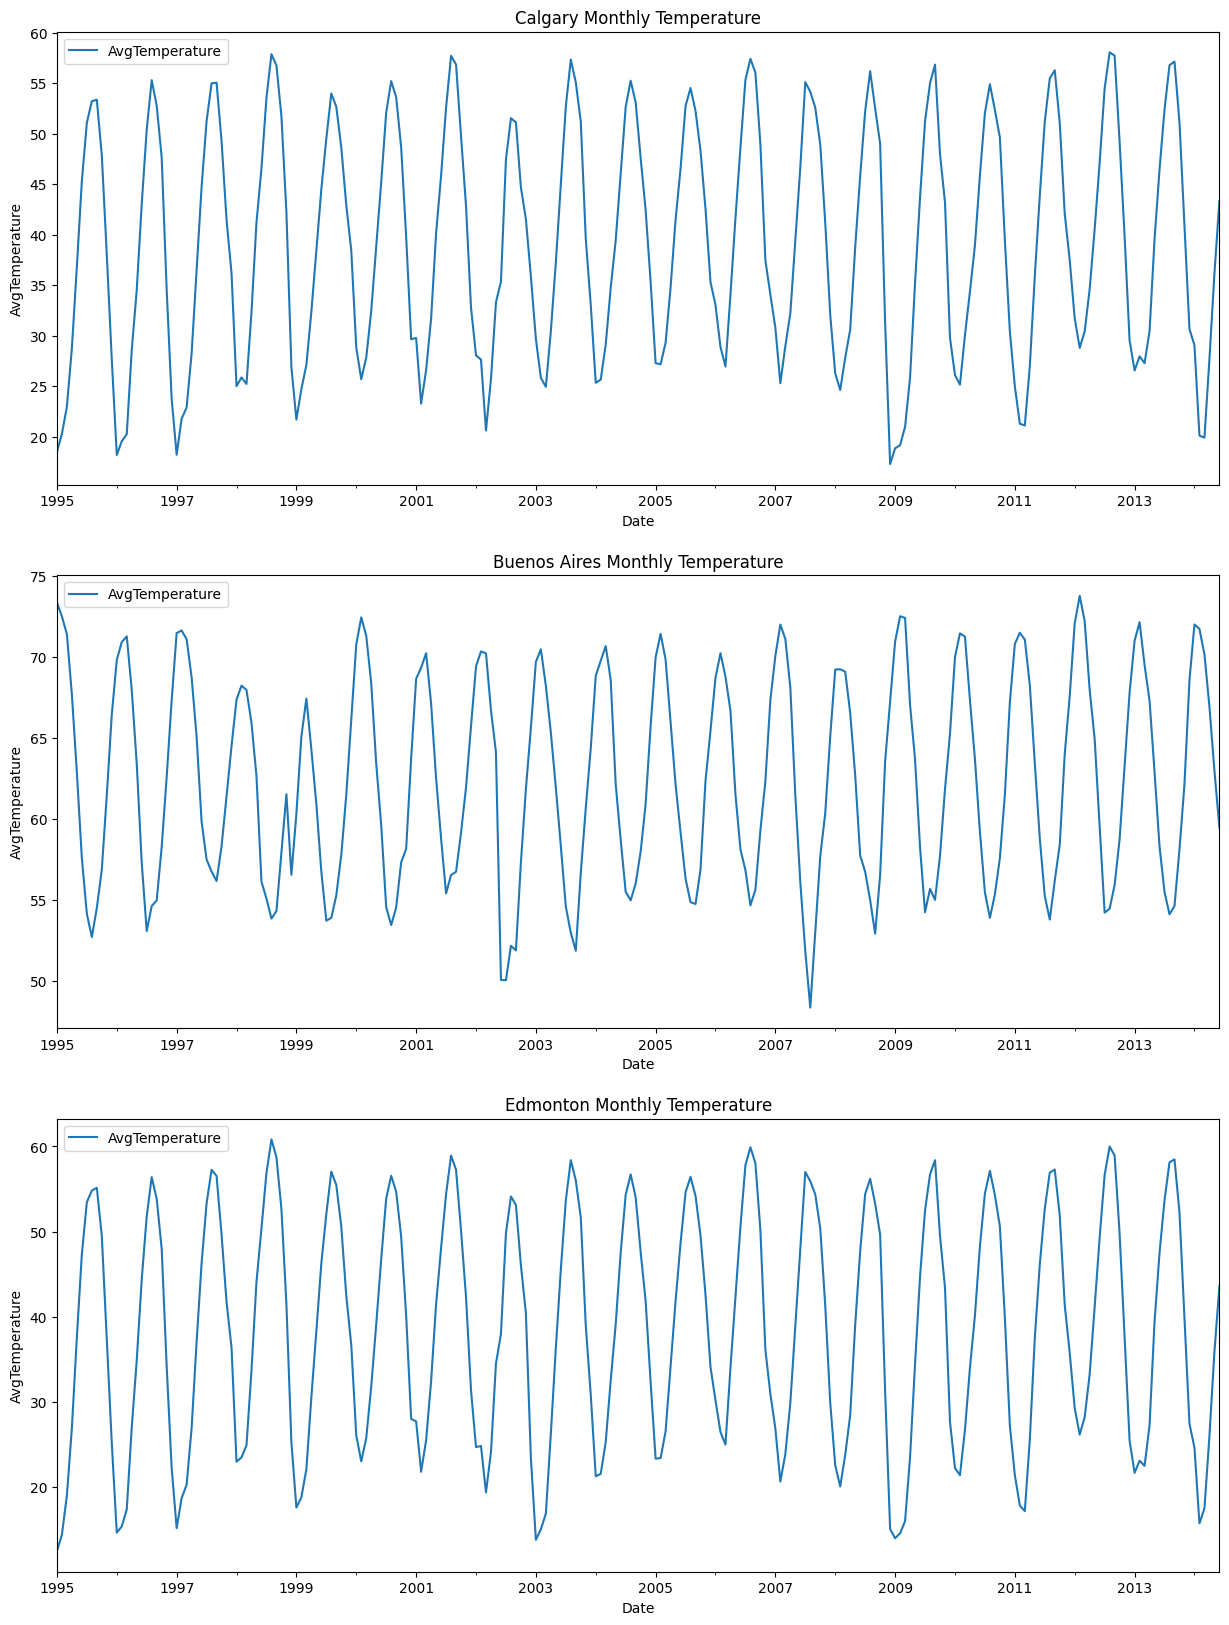

In [89]:
# Plot monthly smoothed temperature data for cities in different subplots

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))

city_1_monthly_smoothed.plot(ax=ax[0], y='AvgTemperature', title=f"{city_1} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_2_monthly_smoothed.plot(ax=ax[1], y='AvgTemperature', title=f"{city_2} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_3_monthly_smoothed.plot(ax=ax[2], y='AvgTemperature', title=f"{city_3} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")

**Enter answer here:** Calgary and Edmonton show very similar trends as they are very close geographically so it makes sense that their temperatures are about the same. Buenos Aires has almost completely opposite trends as it is in the southern hemisphere and thus has the opposite season to Calgary and Edmonton.

## (c)

Text(0, 0.5, 'Correlation')

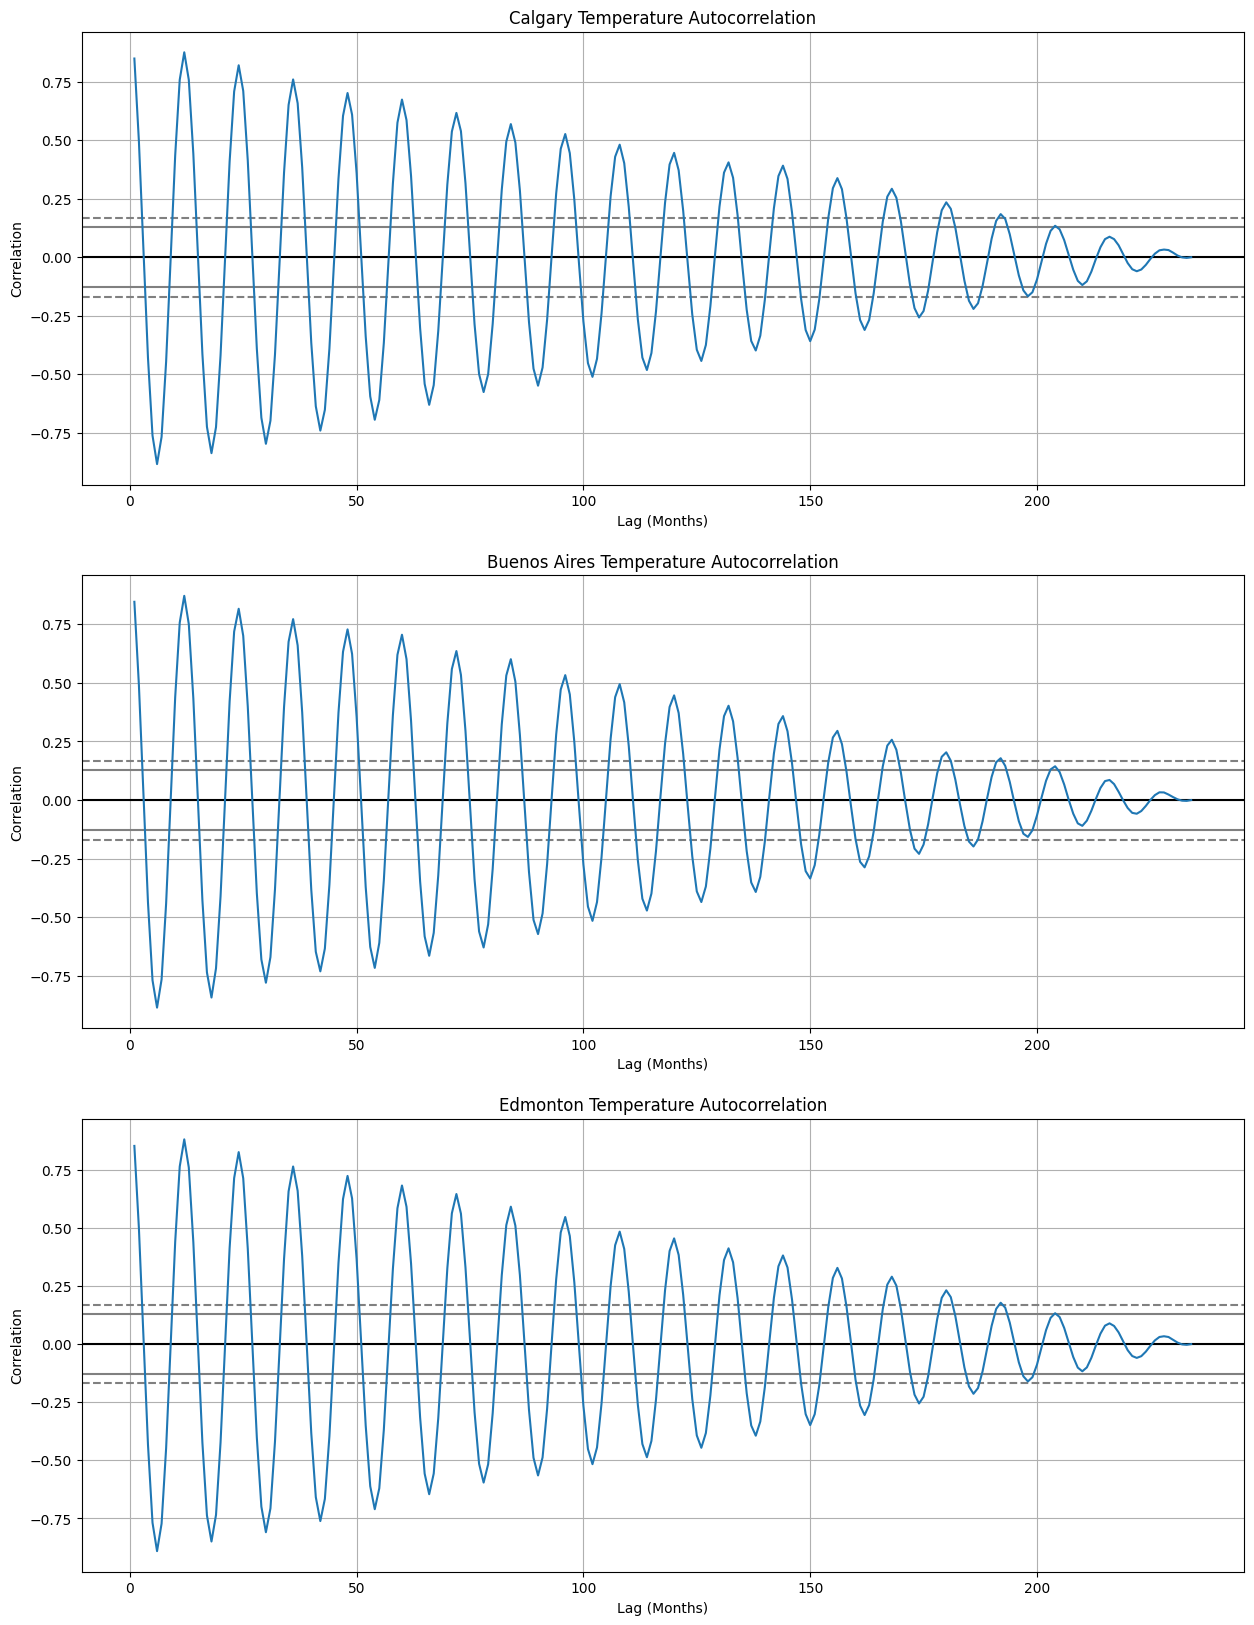

In [90]:
# Plot auto-correlation of the monthly smoothed temperature of cities in different subplots
# Hint: use pd.plotting.autocorrelation_plot()

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

pd.plotting.autocorrelation_plot(city_1_monthly_smoothed['AvgTemperature'], ax=ax[0])
ax[0].set_title(f"{city_1} Temperature Autocorrelation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_2_monthly_smoothed['AvgTemperature'], ax=ax[1])
ax[1].set_title(f"{city_2} Temperature Autocorrelation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_3_monthly_smoothed['AvgTemperature'], ax=ax[2])
ax[2].set_title(f"{city_3} Temperature Autocorrelation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")


**Enter answer here:** The plots show seasonal/annual patters as the structure oscillates. The magnitude of the autocorrelation continues to decrease as lag increases which means the relatinoship between temperatures is less and less over a long time.

## (d)

Text(0, 0.5, 'Correlation')

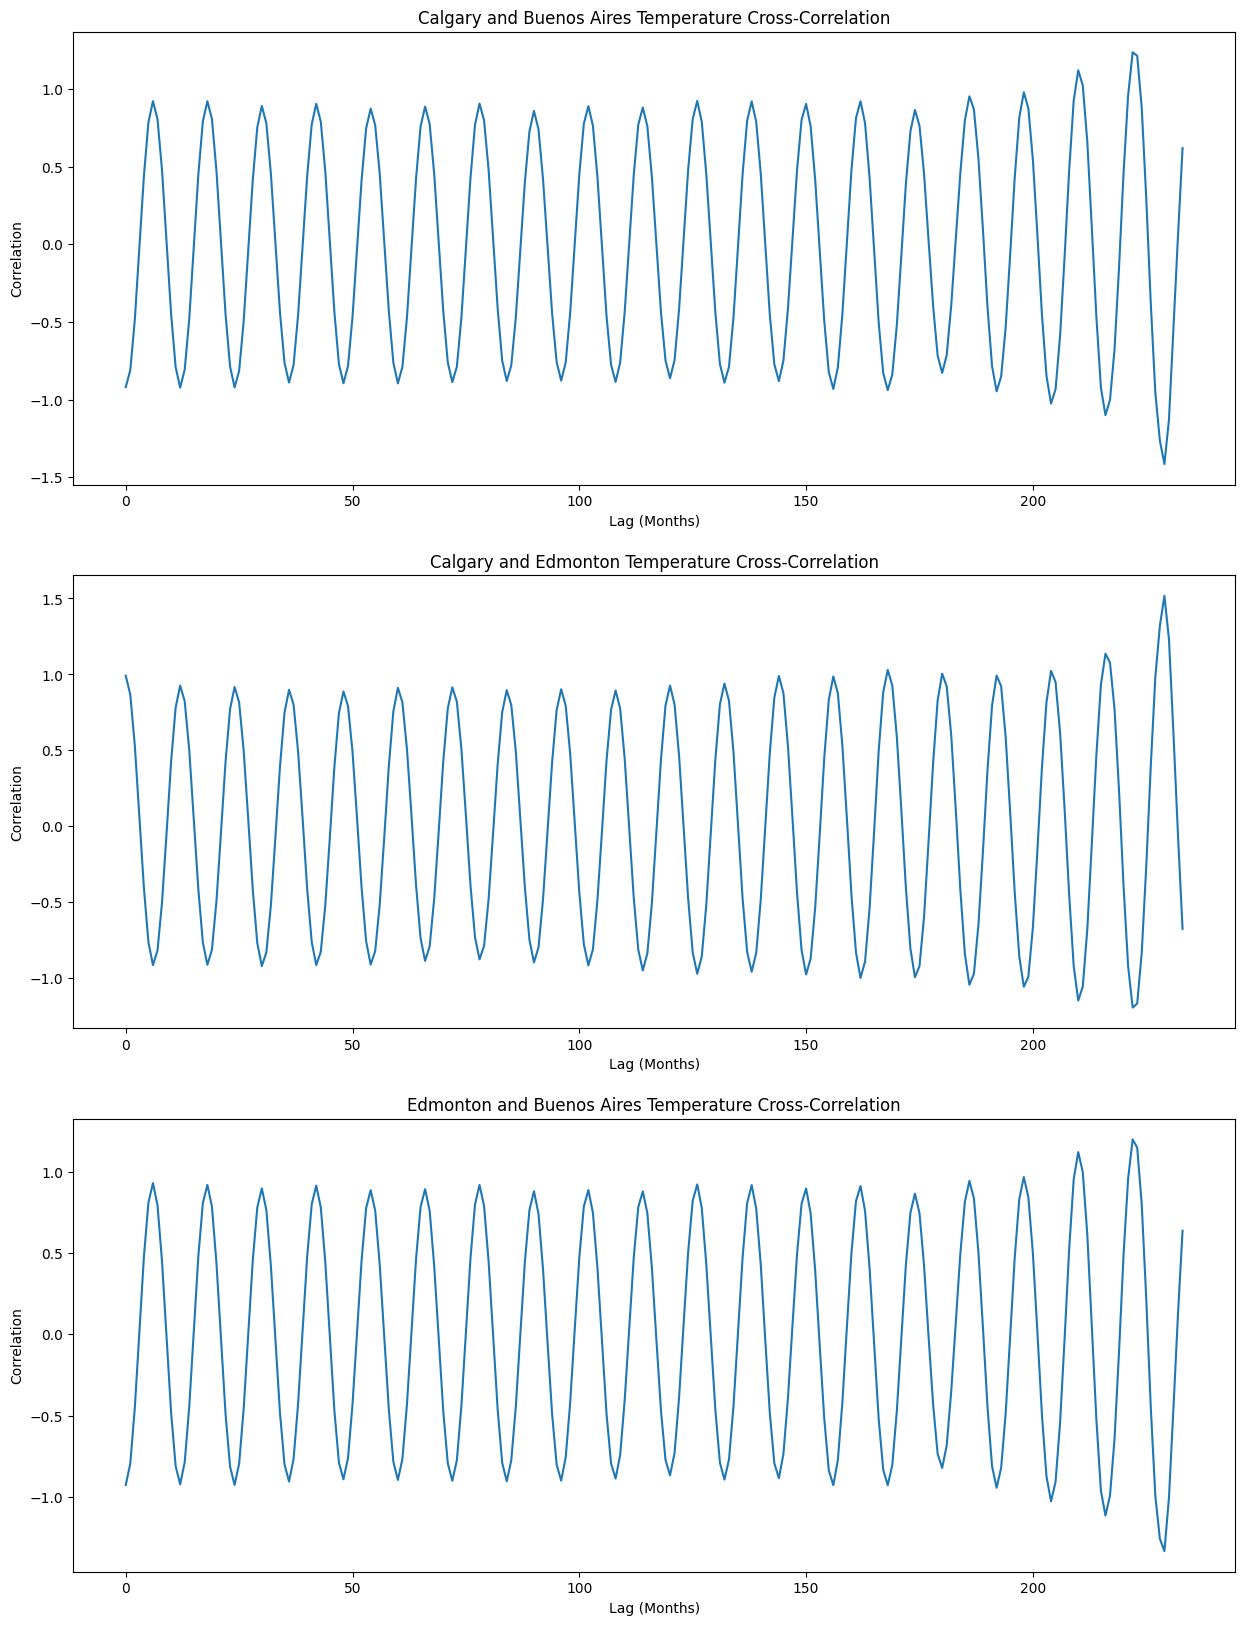

In [91]:
# Plot cross-correlation between city pairs (Calgary and Buenos Aires, Calgary and Edmonton, Buenos Aires and Edmonton)
# Hint: use ccf() function from statsmodels.tsa.stattools

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

ccf_12 = ccf(city_1_monthly_smoothed['AvgTemperature'], city_2_monthly_smoothed['AvgTemperature'])
ccf_13 = ccf(city_1_monthly_smoothed['AvgTemperature'], city_3_monthly_smoothed['AvgTemperature'])
ccf_23 = ccf(city_3_monthly_smoothed['AvgTemperature'], city_2_monthly_smoothed['AvgTemperature'])

ax[0].plot(ccf_12)
ax[0].set_title(f"{city_1} and {city_2} Temperature Cross-Correlation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

ax[1].plot(ccf_13)
ax[1].set_title(f"{city_1} and {city_3} Temperature Cross-Correlation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

ax[2].plot(ccf_23)
ax[2].set_title(f"{city_3} and {city_2} Temperature Cross-Correlation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")


**Enter answer here:** When it's summer in Edmonton it is also summer in Calgary as both are in the same hemisphere (northern). At this time it is winter in Buenos Aires as it is in the southern hemisphere.